Ce projet est un jeu de données sur les maisons dans la ville de Boston avec des features capitales. Notre objectif est de prédire le prix des maisons dans cette zone en nous basant sur la relation entre les différentes variables. 

Nous disposons des variables quantatives et deux variables catégorielles. Le type de machine learning adapté est le ML supervisé.   

Préparation des données 

In [1]:
import pandas as pd

# Charger le fichier 
file_path = 'C:/Users/HP PROBOOK/Desktop/Projet prédiction de prix/HousingData.csv'

# Charger le fichier CSV dans un DataFrame pandas
df = pd.read_csv(file_path)

# Afficher les premières lignes du DataFrame
print(df.head())

print(f"le jeu de données contient {df.shape[0]} lignes et {df.shape[1]} colonnes") 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
le jeu de données contient 506 lignes et 14 colonnes


In [2]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Explication des features 

CRIM : Taux de criminalité par habitant.

ZN : Proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés.

INDUS : Proportion d'acres de la ville affectés à des activités non commerciales.

CHAS : Variable fictive Charles River (1 si le tracé est en bord de la rivière; 0 sinon).

NOX : Concentration d'oxyde nitrique (parties par 10 millions).

RM : Nombre moyen de pièces par logement.

AGE : Proportion des unités occupées par leurs propriétaires construites avant 1940.

DIS : Distances pondérées par la distance aux cinq principaux pôles d'emplois de Boston.

RAD : Indice d'accessibilité aux autoroutes radiales.

TAX : Taux d'imposition foncière par 10 000 $.

PTRATIO : Ratio élèves/enseignant par commune.

B : 1000(Bk - 0.63)^2 où Bk est la proportion de résidents noirs par commune.

LSTAT : Pourcentage de la population à faible statut socio-économique.

MEDV : Valeur médiane des maisons occupées par leur propriétaire en milliers de dollars (variable cible).

Ces caractéristiques sont utilisées pour prédire la variable cible MEDV (prix médian des maisons). Explorer les relations entre ces variables et la valeur médiane des maisons vous aidera à comprendre quels facteurs influencent le plus les prix des propriétés.

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Separons notre jeu de données en train et test 

In [4]:
# import de la méthode train_test_split 
from sklearn.model_selection import train_test_split 

# Separtion en train et test 

df_train, df_test = train_test_split(df, test_size=0.3, random_state=50)

Description des variables après séparation 

In [5]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 251 to 176
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     337 non-null    float64
 1   ZN       341 non-null    float64
 2   INDUS    341 non-null    float64
 3   CHAS     340 non-null    float64
 4   NOX      354 non-null    float64
 5   RM       354 non-null    float64
 6   AGE      342 non-null    float64
 7   DIS      354 non-null    float64
 8   RAD      354 non-null    int64  
 9   TAX      354 non-null    int64  
 10  PTRATIO  354 non-null    float64
 11  B        354 non-null    float64
 12  LSTAT    339 non-null    float64
 13  MEDV     354 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 41.5 KB


In [6]:
df_test.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 365 to 364
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     149 non-null    float64
 1   ZN       145 non-null    float64
 2   INDUS    145 non-null    float64
 3   CHAS     146 non-null    float64
 4   NOX      152 non-null    float64
 5   RM       152 non-null    float64
 6   AGE      144 non-null    float64
 7   DIS      152 non-null    float64
 8   RAD      152 non-null    int64  
 9   TAX      152 non-null    int64  
 10  PTRATIO  152 non-null    float64
 11  B        152 non-null    float64
 12  LSTAT    147 non-null    float64
 13  MEDV     152 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 17.8 KB


Imputation des valeurs manquantes 

Nous remarquons la présence de valeurs manquantes dans plusieurs features : 

CRIM : Taux de criminalité par habitant, très important pour evaluer le prix d'une maison 
ZN : Proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés. C'est aussi un facteur très determinant dans la fixation du prix d'une maison.  
INDUS : Proportion d'acres de la ville affectés à des activités non commerciales
CHAS : Variable fictive Charles River (1 si le tracé est en bord de la rivière; 0 sinon) 
Proportion des unités occupées par leurs propriétaires construites avant 1940. L'anciennete influence aussi le prix d'une maison. 
LSTAT : Pourcentage de la population à faible statut socio-économique. Cette varible est aussi très importante. 

CRIM, AGE, LSTAT  : Nous pouvons imputer les nAN par la moyenne dans ces varibles 

ZN, INDUS et CHAS : Nous allons utiliser le mode 

In [7]:
# Imputation par la moyenne 

Col_nan_moy = ['CRIM', 'AGE', 'LSTAT'] 

for colonne in Col_nan_moy:
    df_train[colonne] = df_train[colonne].fillna(df[colonne].mean())

print(df_train)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
251  0.21409  22.0   5.86   0.0  0.431  6.438   8.9  7.3967    7  330   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
257  0.61154  20.0   3.97   0.0  0.647  8.704  86.9  1.8010    5  264   
35   0.06417   0.0   5.96   0.0  0.499  5.933  68.2  3.3603    5  279   
339  0.05497   0.0   5.19   0.0  0.515  5.985  45.4  4.8122    5  224   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
289  0.04297  52.5   5.32   0.0  0.405  6.565  22.9  7.3172    6  293   
109  0.26363   0.0   8.56   0.0  0.520  6.229  91.2  2.5451    5  384   
395  8.71675   0.0  18.10   0.0  0.693  6.471  98.8  1.7257   24  666   
480  5.82401   0.0  18.10   0.0  0.532  6.242  64.7  3.4242   24  666   
176  0.07022   0.0   4.05   0.0  0.510  6.020  47.2  3.5549    5  296   

     PTRATIO       B      LSTAT  MEDV  
251     19.1  377.07   3.590000  24.8  
3       18.7  394.63   2.940000  33.4  
257

In [8]:
# Imputation par le mode 

Col_nan_mode = ["ZN", "INDUS", "CHAS"] 
for colonne in Col_nan_mode:
    mode_value = df_train[colonne].mode()[0]
    df_train[colonne] = df_train[colonne].fillna(mode_value)

print(df_train) 

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
251  0.21409  22.0   5.86   0.0  0.431  6.438   8.9  7.3967    7  330   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
257  0.61154  20.0   3.97   0.0  0.647  8.704  86.9  1.8010    5  264   
35   0.06417   0.0   5.96   0.0  0.499  5.933  68.2  3.3603    5  279   
339  0.05497   0.0   5.19   0.0  0.515  5.985  45.4  4.8122    5  224   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
289  0.04297  52.5   5.32   0.0  0.405  6.565  22.9  7.3172    6  293   
109  0.26363   0.0   8.56   0.0  0.520  6.229  91.2  2.5451    5  384   
395  8.71675   0.0  18.10   0.0  0.693  6.471  98.8  1.7257   24  666   
480  5.82401   0.0  18.10   0.0  0.532  6.242  64.7  3.4242   24  666   
176  0.07022   0.0   4.05   0.0  0.510  6.020  47.2  3.5549    5  296   

     PTRATIO       B      LSTAT  MEDV  
251     19.1  377.07   3.590000  24.8  
3       18.7  394.63   2.940000  33.4  
257

A présent, visualisons les données stats de nos variables  

In [9]:
df_train.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.516350,11.848870,11.134011,0.050847,0.551053,6.289932,67.410797,3.883843,9.310734,404.799435,18.488701,358.466638,12.587914,22.358757
std,8.752626,24.136455,6.840458,0.219997,0.115966,0.665983,27.777178,2.139605,8.581524,166.806335,2.138686,90.139817,6.844028,8.769771
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.863000,2.900000,1.169100,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.080388,0.000000,5.130000,0.000000,0.448250,5.889500,45.725000,2.145350,4.000000,277.500000,17.400000,377.255000,7.390000,17.225000
50%,0.281745,0.000000,9.690000,0.000000,0.532000,6.211000,72.800000,3.247700,5.000000,330.000000,19.000000,392.115000,11.570000,21.200000
75%,3.611874,12.500000,18.100000,0.000000,0.624000,6.622750,92.975000,5.287300,8.000000,666.000000,20.200000,396.780000,16.462500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


Visualisons les potentiels outliers parmi nos données et les relations des features avec notre target 

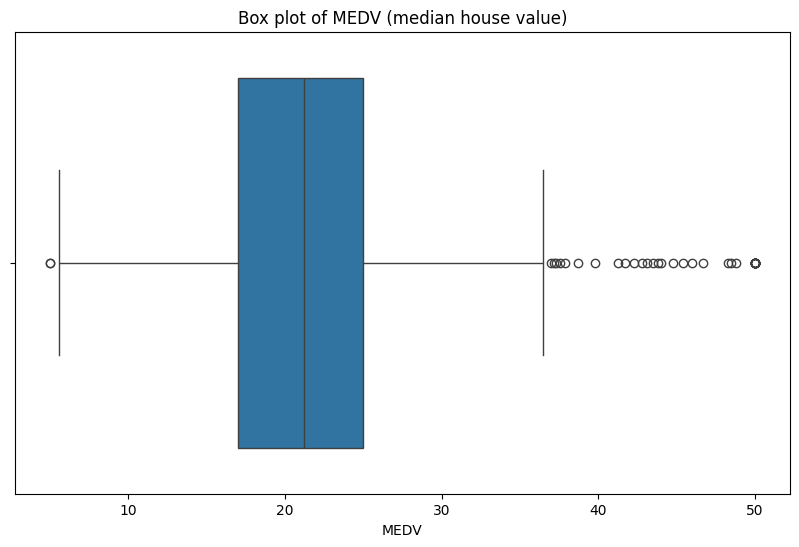

In [10]:

import seaborn as sns
import matplotlib.pyplot as plt


# Visualiser les outliers avec un box plot pour la variable cible 'MEDV'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['MEDV'])
plt.title('Box plot of MEDV (median house value)')
plt.show()




On remarque la présence de plusieurs valeurs un peu eloignées de la limite supérieur des quartiles. Il n'y a aucun outlier, il s'agit de valeurs normales des prix médians seulement qu'elles sont moins fréquentes que les autres.  

Intéressons-nous maintenant au features; 

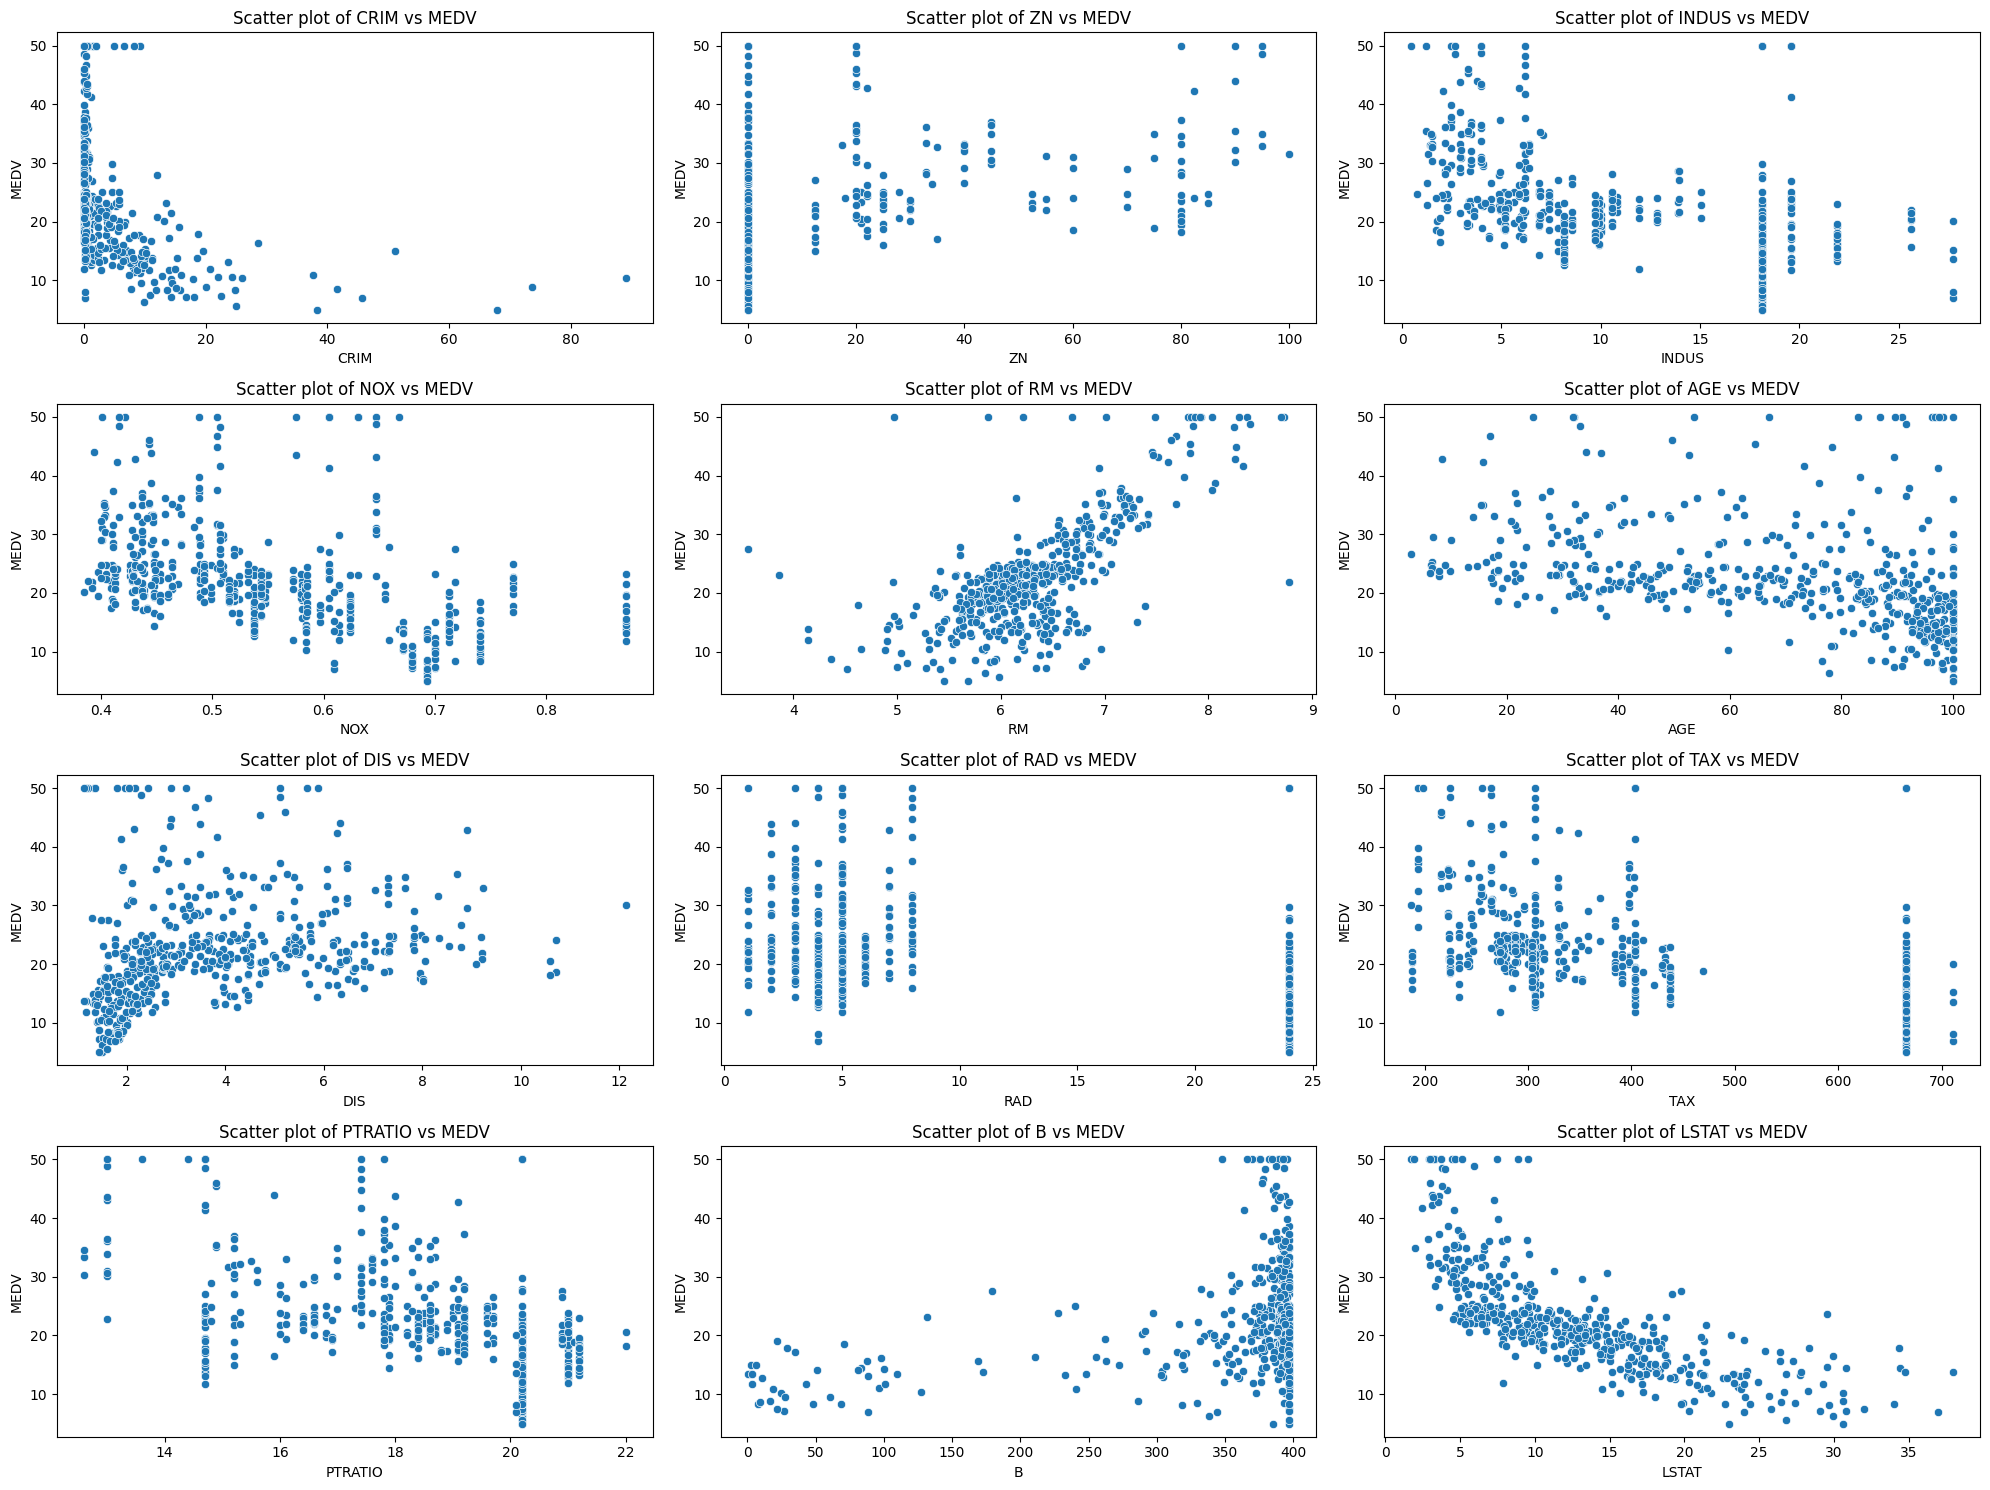

In [11]:
# Visualiser les relations et détecter les outliers avec scatter plots
features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(x=df[feature], y=df['MEDV'])
    plt.title(f'Scatter plot of {feature} vs MEDV')

plt.tight_layout()
plt.show()

- Entre CRIM et MEDV 
On remarque une nette relation entre le taux de criminalité et notre valeur cible. En effet, non seulement que ce taux influence le prix des maisons, on remarque aussi que la majeur partie des maisons sont situées dans les zones où le taux de criminamité est inférieur à 30%. Nous pouvons cependant fixer a limite à 50% et de ce fait considérer les autres valeurs plus elognées comme aberantes. 

- Entre ZN et MEDV 
On remarque une repartition normale des maisons dans la plage de 20 à 100. Ce taux influence vraiment sur le prix de la maison. Cependant, il y a un fait un peu anormal. Le graph nous montre la présence des maisons dont les prix varient du minimum jusqu'au maximum de notre target dans la zone avec un ZN de 0. Mais on peut toutefois les ignorer étant donnée que ce n'est pas le seul facteur à prendre en compte. Certains peuvent payer une maison chère dans de telle zone à cause de sa superficie et du nombre de chambres disponibles par exemple. 

- Entre INDUS et MEDV 
Constat bien normal, la plupart des habitants sont situés dans les zones avec un taux d'INDUS de moins de 20. Les zones d'INDUS trop elevés indiquent une forte présence d'activités industrielles. Ce qui va certainement affecter la qualité de l'environnemnt dans la zone et donc influencer le marché de l'immobilier. 

- Le NOX est un facteur très important dans le choix et le prix de la maison. On remarque que beaucoup préferent les maisons dans les zones avec un faible niveau de concentration d'oxyde nitrique. 

- Le RM aussi influence le prix, chose très normale. Plus le nombre de chambre est élevé, plus la probabilité du prix s'accroit. 

- L'AGE aussi impact fortement sur le prix des maisons. Cependant, nous remarquons la présence des maisons de 50 millions dans la plage d'ancienneté de 80 à 100 ans. Certainement des choix influencés par d'autres facteurs. 

- La DIS distance pondérée aussi agit beaucoup sur le prix des maisons. Très peu de personnes accepent les maisons très eloignées des principaux pôles d'emploi dans la ville. 

- L'indice d'accessibilité (RAD) auto route varie fortement entre 1 et 10. Nous allons considérer les autres commes étant des outliers. 

- Le taux d'imposition foncière TAX est compris entre 200 et 500; les valeurs à l'exterieur de cet intervalle seront considérées comme aberantes. 

- Le ratio elève enseignant PTRATIO n'a pas vraiment d'influence sur le prix. 

-  La varible B indique que la majeure partie des maisons y compris les plus chères sont situées dans les zones avec une proportion des noirs plus elevée. 

- Plus le % des populations à statut socio-economique est faible dans une zone, plus les prix sont elevés. Pas suprenant, car les riches aiment cohabiter à côté de leur semblables. 

Traçons la matrice de la correlation entre les variables 

In [12]:
# Matrice de correletion 

df_train = df_train.select_dtypes(include='number')

df_train.corr() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.180257,0.369084,-0.041255,0.390327,-0.180098,0.336899,-0.346733,0.592407,0.546011,0.250488,-0.382921,0.406022,-0.368325
ZN,-0.180257,1.000000,-0.492490,-0.060435,-0.511462,0.279702,-0.536396,0.674708,-0.305342,-0.306343,-0.369477,0.170377,-0.410012,0.331957
INDUS,0.369084,-0.492490,1.000000,0.042257,0.725762,-0.395190,0.610209,-0.675999,0.583931,0.720135,0.408753,-0.355935,0.587674,-0.516477
CHAS,-0.041255,-0.060435,0.042257,1.000000,0.096942,0.023245,0.088934,-0.095480,-0.023398,-0.047120,-0.107152,0.027248,0.048604,0.083610
NOX,0.390327,-0.511462,0.725762,0.096942,1.000000,-0.279113,0.718725,-0.770909,0.575263,0.641031,0.149831,-0.399507,0.578976,-0.424671
RM,-0.180098,0.279702,-0.395190,0.023245,-0.279113,1.000000,-0.219211,0.177936,-0.174123,-0.280594,-0.346171,0.122558,-0.585536,0.738957
AGE,0.336899,-0.536396,0.610209,0.088934,0.718725,-0.219211,1.000000,-0.730428,0.437647,0.490439,0.262870,-0.273200,0.587682,-0.371635
DIS,-0.346733,0.674708,-0.675999,-0.095480,-0.770909,0.177936,-0.730428,1.000000,-0.470725,-0.517887,-0.232629,0.288105,-0.492481,0.247530
RAD,0.592407,-0.305342,0.583931,-0.023398,0.575263,-0.174123,0.437647,-0.470725,1.000000,0.900167,0.444171,-0.453323,0.460675,-0.388344
TAX,0.546011,-0.306343,0.720135,-0.047120,0.641031,-0.280594,0.490439,-0.517887,0.900167,1.000000,0.452124,-0.448648,0.535129,-0.497391


Traitement des valeurs abérrantes

Comme annoncé, nous allons tronquer les valeurs les observations à l'extreme de 50 pour la variable CRIM. 

Nous allons utiliser la méthode apply. 

In [13]:
# Troncatuer les valeurs extrêmes 

df_train['CRIM'] = df_train['CRIM'].clip(upper=50)
df_train['RAD'] = df_train['RAD'].clip(upper=10)
df_train['TAX'] = df_train['TAX'].clip(upper=500) 

Nous reprenons le même exercice pour les variables RAD et TAX 

L'encoding : Nous allons travailler avec la variable RAD 

In [14]:
# Application du One Hot Encoding
df_train_encoded = pd.get_dummies(df_train, columns=['RAD'], prefix='cat') 

print(df_train_encoded) 

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
251  0.21409  22.0   5.86   0.0  0.431  6.438   8.9  7.3967  330     19.1   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  222     18.7   
257  0.61154  20.0   3.97   0.0  0.647  8.704  86.9  1.8010  264     13.0   
35   0.06417   0.0   5.96   0.0  0.499  5.933  68.2  3.3603  279     19.2   
339  0.05497   0.0   5.19   0.0  0.515  5.985  45.4  4.8122  224     20.2   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...      ...   
289  0.04297  52.5   5.32   0.0  0.405  6.565  22.9  7.3172  293     16.6   
109  0.26363   0.0   8.56   0.0  0.520  6.229  91.2  2.5451  384     20.9   
395  8.71675   0.0  18.10   0.0  0.693  6.471  98.8  1.7257  500     20.2   
480  5.82401   0.0  18.10   0.0  0.532  6.242  64.7  3.4242  500     20.2   
176  0.07022   0.0   4.05   0.0  0.510  6.020  47.2  3.5549  296     16.6   

     ...  MEDV  cat_1  cat_2  cat_3  cat_4  cat_5  cat_6  cat_7  cat_8  cat

Construction du pipeline 

In [15]:

from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LinearRegression 
from sklearn.base import BaseEstimator, TransformerMixin

In [16]:
pip install xgboost lightgbm 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import xgboost as xgb
import lightgbm as lgb


In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor  
from lightgbm import LGBMRegressor  
from sklearn.metrics import mean_absolute_error 

In [19]:
X_df_train = df_train.drop(['MEDV','PTRATIO'], axis=1)  
y_df_train = df_train['MEDV'] 
X_df_test = df_test.drop(['MEDV','PTRATIO'], axis=1)
y_df_test = df_test['MEDV']

In [20]:


# Créer une classe personnalisée pour la troncature des outliers
class OutlierTruncator(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['CRIM'] = X['CRIM'].apply(lambda x: min(x, 50)) 
        X['RAD'] = X['AGE'].apply(lambda x: min(x, 10))
        X['TAX'] = X['LSTAT'].apply(lambda x: min(x, 500))
        return X

# Définir les colonnes numériques et catégorielles
numeric_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT']
categorical_features = ['CHAS', 'RAD']

# Pipeline pour les caractéristiques numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputation par la moyenne pour les numériques
    ('scaler', StandardScaler())
])

# Pipeline pour les caractéristiques catégorielles
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputation par le mode pour les catégorielles
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Ignorer les catégories inconnues
])

# Combiner les transformateurs
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



In [21]:
# Créer le pipeline complet avec l'étape de troncature des outliers
pipeline = Pipeline(steps=[
    ('outlier_truncator', OutlierTruncator()),
    ('preprocessor', preprocessor),
    ])

pipeline 

Pipeline(steps=[('outlier_truncator', OutlierTruncator()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CRIM', 'ZN', 'INDUS', 'NOX',
                                                   'RM', 'AGE', 'DIS', 'TAX',
                                                   'B', 'LSTAT']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CHAS', 'RAD'])]))])

In [22]:
# Entraîner le pipeline
pipeline.fit(X_df_train, y_df_train) 


Pipeline(steps=[('outlier_truncator', OutlierTruncator()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CRIM', 'ZN', 'INDUS', 'NOX',
                                                   'RM', 'AGE', 'DIS', 'TAX',
                                                   'B', 'LSTAT']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CHAS', 'RAD'])]))])

In [23]:
# Vérifiez l'adéquation des colonnes dans X_df_test
print(X_df_test.columns)  # Pour vérifier les colonnes de votre jeu de données de test

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'B', 'LSTAT'],
      dtype='object')


In [24]:
import numpy as np 
from sklearn.model_selection import cross_val_predict 
models = [
    DecisionTreeRegressor(random_state=50),
    RandomForestRegressor(random_state=50),
    GradientBoostingRegressor(random_state=50),
    XGBRegressor(n_estimators=100, max_depth=5),
    LGBMRegressor(n_estimators=100, max_depth=5, learning_rate=0.1),
]   

mae_scores = []

for model in models:
    y_train_pred = cross_val_predict(model, X_df_train, y_df_train, cv=3, n_jobs=-1)
                                     
    mae_scores.append(mean_absolute_error(y_df_train, y_train_pred))


best_model_mae = models[np.argmin(mae_scores)].__class__.__name__ 
best_model_mae_score = np.min(mae_scores) 

print(f"Meilleur modèle selon la MAE : {best_model_mae} (MAE={best_model_mae_score:.3f})") 

Meilleur modèle selon la MAE : GradientBoostingRegressor (MAE=2.501)


De tous les modèles entraînés, on déduit que le modèle de Gradient Boosting est celui qui nous présente le meilleur score, d'après le métrique d'évaluation MAE. C'est un score acceptable au vu des données que nous disposons et de la l'enjeu du métier. 

On peut donc enregister notre modèle et continuer avec les étapes de la pré production ! 

In [25]:
import joblib

# Enregistrer le modèle
joblib.dump(model, "gradient_boosting_model.pkl")

# Charger plus tard pour vérification
loaded_model = joblib.load("gradient_boosting_model.pkl") 
